In [1]:
import sys
sys.path.insert(1, '..')
import importlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Load Data

In [2]:
df = pd.read_csv('../data/kidney-exchange/survey2_data.csv')
df.columns

Index(['1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '2x3', '2x4', '2x5',
       '2x6', '2x7', '2x8', '3x4', '3x5', '3x6', '3x7', '3x8', '4x5', '4x6',
       '4x7', '4x8', '5x6', '5x7', '5x8', '6x7', '6x8', '7x8',
       'Voter Strategy 0', '2x1', '3x1', '4x1', '5x1', '6x1', '7x1', '8x1',
       '3x2', '4x2', '5x2', '6x2', '7x2', '8x2', '4x3', '5x3', '6x3', '7x3',
       '8x3', '5x4', '6x4', '7x4', '8x4', '6x5', '7x5', '8x5', '7x6', '8x6',
       '8x7', 'Voter Strategy 1'],
      dtype='object')

Number of pairwise comparisons per voter? Easy - just as many as the number of unique voters.

Save the various voter strategies for later, if necessary:

In [3]:
strategies = pd.concat([df["Voter Strategy 0"].dropna(), df["Voter Strategy 1"].dropna()])
# strategies.to_csv("../data/kidney-exchange/survey2_strategy.csv", index=False)
sc = pd.read_csv("../data/kidney-exchange/survey2_strategy.csv")
## 0 - no ranking (strategy not used); 1-3 ranked choice of strategy; negative magnitude means acted opposite the heuristic
sc['Older'] = np.abs(sc['Younger'][sc['Younger'] < 0])
sc['Younger'].loc[sc['Younger'] < 0,] = 0
sc['Drink more'] = np.abs(sc['Drink less'][sc['Drink less'] < 0])
sc['Drink less'].loc[sc['Drink less'] < 0,] = 0
sc['Unhealthy'] = np.abs(sc['Healthy'][sc['Healthy'] < 0])
sc['Healthy'].loc[sc['Healthy'] < 0,] = 0
options = ['Older', 'Younger', 'Drink more', 'Drink less', 'Unhealthy', 'Healthy']
# number of people with no heuristics
((sc[options] == 0) | (sc[options].isna())).all(1).value_counts()

/opt/miniconda3/envs/hmm/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


False    254
True      35
dtype: int64

In [4]:
def borda(x, key):
    count = 0
    key_val = x[key]
    if key_val == 0: return 0
    for val in x[[o for o in options if o != key]]:
        if val == 0 or key_val < val:
            count += 1
    return count

sc = sc.fillna(0)
borda = pd.DataFrame([sc.apply(borda, axis=1, args=(key,)) for key in options]).transpose()
borda.columns = options
borda.to_csv("../figures/data/ke-borda.csv")
borda.mean()

Older         0.107266
Younger       3.415225
Drink more    0.041522
Drink less    2.705882
Unhealthy     0.190311
Healthy       2.089965
dtype: float64

In [5]:
df_0 = df[[
    '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '2x3', '2x4', '2x5', '2x6', '2x7', '2x8', '3x4', 
    '3x5', '3x6', '3x7', '3x8', '4x5', '4x6', '4x7', '4x8', '5x6', '5x7', '5x8', '6x7', '6x8', '7x8'
]].dropna()
df_1 = df[[
    '2x1', '3x1', '4x1', '5x1', '6x1', '7x1', '8x1', '3x2', '4x2', '5x2', '6x2', '7x2', '8x2', '4x3', 
    '5x3', '6x3', '7x3', '8x3', '5x4', '6x4', '7x4', '8x4', '6x5', '7x5', '8x5', '7x6', '8x6', '8x7', 
]].dropna()
df_0.head(2)

,1x2,1x3,1x4,1x5,1x6,1x7,1x8,2x3,2x4,2x5,...,4x5,4x6,4x7,4x8,5x6,5x7,5x8,6x7,6x8,7x8
3,"Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient J.B. is 30 years old, had 1 alcoholic ...","Patient V.S. is 30 years old, had 5 alcoholic ...","Patient V.S. is 30 years old, had 5 alcoholic ...",...,"Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient M.K. is 70 years old, had 1 alcoholic ...","Patient J.F. is 70 years old, had 5 alcoholic ...","Patient M.K. is 70 years old, had 1 alcoholic ..."
5,"Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient W.A. is 30 years old, had 1 alcoholic ...","Patient V.S. is 30 years old, had 5 alcoholic ...","Patient V.S. is 30 years old, had 5 alcoholic ...","Patient V.S. is 30 years old, had 5 alcoholic ...",...,"Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient K.D. is 30 years old, had 5 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient Y.D. is 70 years old, had 1 alcoholic ...","Patient M.K. is 70 years old, had 1 alcoholic ...","Patient J.F. is 70 years old, had 5 alcoholic ...","Patient M.K. is 70 years old, had 1 alcoholic ..."


In [6]:
print(df_0.shape[0])
print(df_1.shape[0])
print(df.shape[0])

141
148
289


## Preprocessing

1. Hardcode the patient profiles.
2. Replace each pairwise comparison with the actual patient features, and translate the label. Preserve exogenous features.

### Patient Profiles
- ID: patient #
- Age: age in years
- Alcohol consumption: number of drinks per day
- Skin cancer in remission: whether or not the patient has skin cancer in remission

In [7]:
features_endo = ["ID", "Abbrv.", "Initials", "Age", "AlcoholConsumption", "SkinCancer"]
patients = pd.DataFrame([
    [1, "YRH", "W.A.", 30, 1, 0],
    [2, "YFH", "V.S.", 30, 5, 0],
    [3, "YRC", "J.B.", 30, 1, 1],
    [4, "YFC", "K.D.", 30, 5, 1],
    [5, "ORH", "Y.D.", 70, 1, 0],
    [6, "OFH", "J.F.", 70, 5, 0],
    [7, "ORC", "M.K.", 70, 1, 1],
    [8, "OFC", "R.F.", 70, 5, 1]
], columns=features_endo)
features_endo.remove("Abbrv.")
patients

,ID,Abbrv.,Initials,Age,AlcoholConsumption,SkinCancer
0,1,YRH,W.A.,30,1,0
1,2,YFH,V.S.,30,5,0
2,3,YRC,J.B.,30,1,1
3,4,YFC,K.D.,30,5,1
4,5,ORH,Y.D.,70,1,0
5,6,OFH,J.F.,70,5,0
6,7,ORC,M.K.,70,1,1
7,8,OFC,R.F.,70,5,1


### Transformation

In [8]:
from collections import namedtuple
import re

rows = []
regexp = re.compile(r'^Patient ([A-Z.]{4})')
for df in [df_0, df_1]:
    for column in df.columns:
        choices_num = [int(x) for x in column.split("x")]
        choices = patients[patients["ID"]\
            .isin(choices_num)]\
            .sort_values("ID", ascending=(choices_num[0] < choices_num[1]))\
            .reset_index()
        for i, choice in enumerate(df[column].values):
            row = {
                "{}_{}".format(f, s): choices[f].iloc[s]
                for f in choices.columns for s in range(2)
            }
            row['VoterID'] = i
            chosen_initials = regexp.search(choice).group(1)
            row['Chosen'] = choices.index[choices["Initials"] == chosen_initials][0]
            rows.append(row)

df_pairwise = pd.DataFrame(rows)
df_pairwise = df_pairwise.set_index([df_pairwise.index, 'VoterID'])
df_pairwise

,,index_0,index_1,ID_0,ID_1,Abbrv._0,Abbrv._1,Initials_0,Initials_1,Age_0,Age_1,AlcoholConsumption_0,AlcoholConsumption_1,SkinCancer_0,SkinCancer_1,Chosen
,VoterID,,,,,,,,,,,,,,,
0,0,0,1,1,2,YRH,YFH,W.A.,V.S.,30,30,1,5,0,0,0
1,1,0,1,1,2,YRH,YFH,W.A.,V.S.,30,30,1,5,0,0,0
2,2,0,1,1,2,YRH,YFH,W.A.,V.S.,30,30,1,5,0,0,0
3,3,0,1,1,2,YRH,YFH,W.A.,V.S.,30,30,1,5,0,0,0
4,4,0,1,1,2,YRH,YFH,W.A.,V.S.,30,30,1,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8087,143,7,6,8,7,OFC,ORC,R.F.,M.K.,70,70,5,1,1,1,1
8088,144,7,6,8,7,OFC,ORC,R.F.,M.K.,70,70,5,1,1,1,1
8089,145,7,6,8,7,OFC,ORC,R.F.,M.K.,70,70,5,1,1,1,1


In [9]:
features = ["{}_{}".format(f, s) for f in features_endo for s in range(2) if f != "ID" and f != "Initials"]
num_features = features
cat_features = []
features

['Age_0',
 'Age_1',
 'AlcoholConsumption_0',
 'AlcoholConsumption_1',
 'SkinCancer_0',
 'SkinCancer_1']

In [10]:
df_pairwise.columns

Index(['index_0', 'index_1', 'ID_0', 'ID_1', 'Abbrv._0', 'Abbrv._1',
       'Initials_0', 'Initials_1', 'Age_0', 'Age_1', 'AlcoholConsumption_0',
       'AlcoholConsumption_1', 'SkinCancer_0', 'SkinCancer_1', 'Chosen'],
      dtype='object')

In [11]:
df_proc = df_pairwise.loc[:,features + ["Chosen"]]
# convert to numeric, changing literals to NaN
for f in num_features:
    df_proc.loc[:,f] = pd.to_numeric(df_proc.loc[:,f], errors='coerce')
df_proc.head()

,,Age_0,Age_1,AlcoholConsumption_0,AlcoholConsumption_1,SkinCancer_0,SkinCancer_1,Chosen
,VoterID,,,,,,,
0,0,30,30,1,5,0,0,0
1,1,30,30,1,5,0,0,0
2,2,30,30,1,5,0,0,0
3,3,30,30,1,5,0,0,0
4,4,30,30,1,5,0,0,0


In [12]:
df_proc.describe()

,Age_0,Age_1,AlcoholConsumption_0,AlcoholConsumption_1,SkinCancer_0,SkinCancer_1,Chosen
count,8092.000000,8092.000000,8092.000000,8092.000000,8092.000000,8092.000000,8092.000000
mean,50.276817,49.723183,3.006920,2.993080,0.503460,0.496540,0.500247
std,19.999320,19.999320,2.000112,2.000112,0.500019,0.500019,0.500031
min,30.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,70.000000,30.000000,5.000000,1.000000,1.000000,0.000000,1.000000
75%,70.000000,70.000000,5.000000,5.000000,1.000000,1.000000,1.000000
max,70.000000,70.000000,5.000000,5.000000,1.000000,1.000000,1.000000


### Train/Test Split

In [13]:
import hmm.classification
importlib.reload(hmm.classification)
from hmm.classification import train_test_val_dev_split

X = df_proc.drop(labels=["Chosen"], axis='columns', inplace=False)
y = df_proc["Chosen"]
X_train, X_test, X_val, X_dev, y_train, y_test, y_val, y_dev = train_test_val_dev_split(X, y)
display(X_train.head())
display(y_train.head())

,,Age_0,Age_1,AlcoholConsumption_0,AlcoholConsumption_1,SkinCancer_0,SkinCancer_1
,VoterID,,,,,,
2160,45,30,70,1,5,1,0
1658,107,30,70,5,1,0,1
6927,19,70,30,1,5,1,1
5643,67,70,30,1,5,1,0
4375,131,30,30,5,1,1,0


      VoterID
2160  45         0
1658  107        1
6927  19         0
5643  67         1
4375  131        1
Name: Chosen, dtype: int64

### Labeling Model

What labeling functions to write?

In [14]:
strategies.sample().values

array(["I went with the younger patient whenever I had the option between an older and younger one. If the options were the same, I basically ignored the alcohol characteristic (unless everything else was equal, then I picked the one who drank less) but I thought someone with cancer in remission doesn't need to have yet another health problem to worry about by not getting a kidney, so I picked them."],
      dtype=object)

In [15]:
import hmm.labeling.kidney_exchange as ke
import hmm.labeling.models
import hmm.labeling.utils
importlib.reload(hmm.labeling.kidney_exchange)
importlib.reload(hmm.labeling.models)
importlib.reload(hmm.labeling.utils)

from hmm.labeling.models import Labeler
from snorkel.labeling import LFAnalysis

lfs = [
    ke.age,
    ke.alcohol,
    ke.health
]

labeler = Labeler(lfs)
L_train, L_dev, L_val = labeler.label([X_train, X_dev, X_val])
LFAnalysis(L=L_dev, lfs=lfs).lf_summary(Y=y_dev.values).sort_values("Correct", ascending=False)

/opt/miniconda3/envs/hmm/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 1295/1295 [00:00<00:00, 7168.79it/s]


,j,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.
age,0,"[0, 1]",0.537037,0.395062,0.219136,153,21,0.879310
alcohol,1,"[0, 1]",0.567901,0.432099,0.231481,145,39,0.788043
health,2,"[0, 1]",0.549383,0.376543,0.194444,131,47,0.735955


*Experiment: LF Analysis*

In [16]:
# using the validation set (since tuning is done)
analysis = LFAnalysis(L=L_val, lfs=lfs).lf_summary(Y=y_val.values)
analysis.to_csv("../figures/data/ke-lfanalysis.csv")
# labeling density
pd.DataFrame(L_dev, columns=[lf.name for lf in lfs]).to_csv("../figures/data/ke-density.csv")

## Aggregation

In [126]:
from snorkel.labeling import MajorityLabelVoter

class WeightedMajorityLabelVoter(MajorityLabelVoter):
    def predict_proba(self, L: np.ndarray) -> np.ndarray:
        n, m = L.shape
        Y_p = np.zeros((n, self.cardinality))
        for i in range(n):
            counts = np.zeros(self.cardinality)
            for j in range(m):
                if L[i, j] != -1:
                    # add a weighted count instead of a whole count
                    counts[L[i, j]] += self.mu[j] + self.beta
            Y_p[i, :] = np.where(counts == max(counts), 1, 0)
        Y_p /= Y_p.sum(axis=1).reshape(-1, 1)
        return Y_p
    
    def set_mu(self, borda):
        mu = borda.mean()[["Younger", "Drink less", "Healthy"]].values
        self.mu = mu
        
    def set_beta(self, beta):
        self.beta = beta
        

model_majority = MajorityLabelVoter()
preds_train = model_majority.predict(L=L_train)

model_majority_weighted = WeightedMajorityLabelVoter()
model_majority_weighted.set_mu(borda)
model_majority_weighted.set_beta(0)
preds_train = model_majority_weighted.predict(L=L_train)

*Experiment: LF weighting*

In [99]:
# cardinality is num classes
importlib.reload(hmm.labeling.models)

## normal fitting
model_label = labeler.fit(L_train, Y_dev=y_dev.values)
## TODO: try setting learned heuristic weights as initial weights for model with mu_init
# labeler.model.mu_init = ...
# model_label = labeler.fit(L_train, Y_dev=y_dev.values)
analysis = LFAnalysis(L=L_val, lfs=lfs).lf_summary(Y=y_val.values)
analysis['weight'] = pd.Series(model_label.get_weights(), index=[lf.name for lf in lfs])
analysis.to_csv('../figures/data/ke-weights.csv')
analysis.sort_values('Emp. Acc.')

,j,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.,weight
health,2,"[0, 1]",0.562934,0.444015,0.272587,445,284,0.610425,0.599283
alcohol,1,"[0, 1]",0.568340,0.423166,0.253282,580,156,0.788043,0.603681
age,0,"[0, 1]",0.605405,0.450193,0.272587,652,132,0.831633,0.595006


In [19]:
# what is the label model accuracy per scenario type?
# create a dataframe with scenariotype, gold label, probabilistic label, votes for each LF

preds_scenario = pd.DataFrame(L_val, columns=[lf.name for lf in lfs])

def calc_scenario_type(row):
    age = row["Age_0"] != row["Age_1"]
    alcohol = row["AlcoholConsumption_0"] != row["AlcoholConsumption_1"]
    cancer = row["SkinCancer_0"] != row["SkinCancer_1"]
    
    if (age and alcohol and cancer): return "Random"
    if (age and alcohol): return "Age + Drinking"
    if (age and cancer): return "Age + Health"
    if (alcohol and cancer): return "Drinking + Health"
    if (age): return "Age"
    if (alcohol): return "Drinking"
    if (cancer): return "Health"
    
preds_scenario['scenario'] = X_val.apply(calc_scenario_type, axis=1).values
preds_scenario['actual'] = y_val.values
probs = labeler.model.predict_proba(L=L_val)
probs_weighted_majority = model_majority.predict_proba(L=L_val)
preds_scenario['pred'] = Labeler.probs_to_preds(probs)
preds_scenario['pred_weighted_majority'] = Labeler.probs_to_preds(probs_weighted_majority)
preds_scenario.to_csv("../figures/data/ke-preds_scenario.csv")

In [20]:
importlib.reload(hmm.labeling.models)
from hmm.labeling.models import Labeler

for model in [model_majority_weighted, model_majority, model_label]:
    Labeler.score(model, L_val, y_val)

WeightedMajorityLabelVoter() Vote Accuracy:            85.3
MajorityLabelVoter() Vote Accuracy:            80.2
LabelModel() Vote Accuracy:            80.2


## Baselining

Now, compare our accuracy to Freedman et al. 

In [21]:
profile_scores = pd.DataFrame({
    'j': [1, 3, 2, 5, 4, 7, 6, 8],
    'direct': [1, .236280167, 0.103243396, 0.070045054, 0.035722844, 0.024072427, 0.011349772, 0.002769801],
    'attribute-based': [1, 0.13183083, 0.29106507, 0.03837135, 0.08900390, 0.01173346, 0.02590593, 0.00341520]
})
patient_scores = patients.set_index('ID').join(profile_scores.set_index('j'))
patient_scores

,Abbrv.,Initials,Age,AlcoholConsumption,SkinCancer,direct,attribute-based
ID,,,,,,,
1,YRH,W.A.,30,1,0,1.000000,1.000000
2,YFH,V.S.,30,5,0,0.103243,0.291065
3,YRC,J.B.,30,1,1,0.236280,0.131831
4,YFC,K.D.,30,5,1,0.035723,0.089004
5,ORH,Y.D.,70,1,0,0.070045,0.038371
6,OFH,J.F.,70,5,0,0.011350,0.025906
7,ORC,M.K.,70,1,1,0.024072,0.011733
8,OFC,R.F.,70,5,1,0.002770,0.003415


In [22]:
from sklearn.metrics import accuracy_score

def get_profile_score(x, attribute=False):
    # return the profile matching this patient's profile\
    x.index = [l.split("_")[0] for l in x.index]
    profile = patient_scores[
        (patient_scores['Age'] == x['Age']) & (patient_scores['AlcoholConsumption'] == x['AlcoholConsumption']) & (patient_scores['SkinCancer'] == x['SkinCancer'])
    ].reset_index()
    return profile.loc[0, 'direct' if not attribute else 'attribute-based']

def classify_weighted(x):
    return np.argmax([get_profile_score(x[[c for c in X_train.columns if c.split("_")[1] == str(i)]]) for i in range(2)])

accuracy_score(y_true=y_val.values, y_pred=X_val.apply(classify_weighted, axis=1))

0.8532818532818532

## Classification

In [23]:
import hmm.classification
importlib.reload(hmm.classification)
from hmm.classification import Classifier
from sklearn.model_selection import KFold

clf = Classifier(features, num_features, cat_features)
kf = KFold(n_splits=10, shuffle=True)
freedman_pred = X.apply(classify_weighted, axis=1)

In [24]:
print(np.unique(freedman_pred == model_majority_weighted.predict(labeler.label(X))))

/opt/miniconda3/envs/hmm/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 8092/8092 [00:01<00:00, 7294.21it/s]


[ True]


In [127]:
def kf_cross_val(kf, X_n, y_n):
    gold_acc = []
    lm_acc = []
    freedman_acc = []
    borda_acc = []
    mv_acc = []
    mv_weighted_acc = []
    
    for i_train, i_test in kf.split(X_n):
        # train/test split by fold
        X_train_n, X_test_n = X_n.iloc[i_train], X_n.iloc[i_test]
        y_train_n, y_test_n = y_n.iloc[i_train], y_n.iloc[i_test]
        freedman_pred_n = freedman_pred.iloc[i_test]
        
        # gold accuracy
        clf.fit(X_train_n, y_train_n)
        gold_acc.append(clf.score(X_test_n, y_test_n, verbose=False))
        
        # lm accuracy
        ## train label model
        labeler = Labeler(lfs)
        L_train_n = labeler.label(X_train_n, verbose=False)
        labeler.fit(L_train_n, Y_dev=y_train_n)
        print(labeler.model.get_weights())
        ## label points in X_train
        X_train_filtered_n, probs_train_filtered_n = labeler.filter_probs(X_train_n, L_train_n)
        preds_train_filtered_n = Labeler.probs_to_preds(probs_train_filtered_n)
        ## fit and score
        clf.fit(X_train_filtered_n, preds_train_filtered_n)
        lm_acc.append(clf.score(X_test_n, y_test_n, verbose=False))
        
#         model_majority = MajorityLabelVoter()
#         preds_train = model_majority.predict(L=L_train_n)
#         clf.fit(X_train_n, preds_train)
#         lm_acc.append(clf.score(X_test_n, y_test_n, verbose=False))
        
        # weighted majority voter accuracy
        model_majority_weighted = WeightedMajorityLabelVoter()
        model_majority_weighted.set_mu(borda)
        model_majority_weighted.set_beta(0)
        preds_train = model_majority_weighted.predict(L=L_train_n)
        clf.fit(X_train_n, preds_train)
        borda_acc.append(clf.score(X_test_n, y_test_n, verbose=False))
        
        freedman_acc.append(accuracy_score(y_true=y_test_n.values, y_pred=freedman_pred_n))
        
        L_test_n = labeler.label(X_test_n, verbose=False)
        mv_acc.append(accuracy_score(y_true=y_test_n, y_pred=model_majority.predict(L=L_test_n)))
        mv_weighted_acc.append(accuracy_score(y_true=y_test_n, y_pred=model_majority_weighted.predict(L=L_test_n)))
        
    return gold_acc, lm_acc, freedman_acc, borda_acc, mv_acc, mv_weighted_acc

gold_acc, lm_acc, freedman_acc, borda_acc, mv_acc, mv_weighted_acc = kf_cross_val(kf, X, y)

[0.60065825 0.59925736 0.60018175]
[0.60118259 0.60008732 0.59807322]
[0.59913793 0.59958824 0.60071691]
[0.6007542  0.59817577 0.59878404]
[0.59688951 0.60108231 0.60111073]
[0.59802495 0.59862142 0.59795547]
[0.60083581 0.60226909 0.59986609]
[0.60076277 0.60026477 0.60076818]
[0.59983352 0.59623317 0.59924494]
[0.59682101 0.59934902 0.59778526]


### Training on Gold Labels

Using just the labels (no label model):

In [128]:
def print_score_interval(accs):
    print("{} +/- {}".format(np.mean(accs), np.std(accs)/len(accs)))

print_score_interval(gold_acc)

0.8615896778525538 +/- 0.0011311324849501015


### Training on Heuristic Labels

Using the label model, filter out unlabeled points:

In [129]:
print_score_interval(lm_acc)

0.8115391658654947 +/- 0.0014596384693590283


Weighted majority voting, with classifier:

In [130]:
print_score_interval(borda_acc)
print(borda_acc)

0.8589941857803416 +/- 0.0009139710576597049
[0.8765432098765432, 0.8604938271604938, 0.8467243510506799, 0.8566131025957973, 0.8541409147095179, 0.8726823238566132, 0.8516687268232386, 0.861557478368356, 0.8603213844252163, 0.8491965389369592]


Just the unweighted voting models, no classifier:

In [132]:
print_score_interval(mv_acc)
print_score_interval(mv_weighted_acc)

0.7088482961742131 +/- 0.0009948473828485821
0.8589941857803416 +/- 0.0009139710576597049


### Baseline - Freedman

In [ ]:
print_score_interval(freedman_acc)
print(freedman_acc)

## Experiments

*Experiment: Accuracy by Sample Size*

In [ ]:
clf = Classifier(features, num_features, cat_features)
results = []
kf = KFold(n_splits=5, shuffle=True, random_state=11)

for n in list(range(50, 1000, 10))+list(range(1100,8100,100)):
    sample = X.sample(n).index
    X_n = X.loc[sample]
    y_n = y.loc[sample]
    
    gold_acc, lm_acc, freedman_acc = kf_cross_val(kf, X_n, y_n)
    
    # store results
    res = (n, np.mean(gold_acc), np.std(gold_acc), np.mean(lm_acc), np.std(lm_acc), np.mean(freedman_acc), np.std(freedman_acc))
    print(res)
    results.append(res)
pd.DataFrame(results, columns=["n_rows", "acc_gold", "std_gold", "acc_heuristic", "std_heuristic", "acc_freedman", "std_freedman"]).to_csv("../figures/data/ke-accs_data.csv")

*Experiment: Accuracy by Number of Voters*

Int64Index([  0,   4,   5,   6,   7,  10,  15,  18,  20,  24,  25,  31,  32,
             34,  40,  42,  47,  49,  50,  55,  58,  60,  63,  67,  74,  75,
             77,  80,  81,  85,  90,  92,  93,  95,  96,  97, 101, 103, 106,
            118, 121, 125, 127, 128, 130, 133, 135, 141, 142, 145],
           dtype='int64', name='VoterID')


,Older,Younger,Drink more,Drink less,Unhealthy,Healthy
VoterID,,,,,,
0,0,5,0,4,0,3
4,0,4,0,5,0,3
5,0,0,0,0,0,0
6,0,3,0,5,0,4
7,0,3,0,3,0,3
10,0,4,0,5,0,3
15,0,3,0,3,0,3
18,0,5,0,0,0,0
20,0,5,0,0,0,4


In [104]:
from sklearn.model_selection import train_test_split

clf = Classifier(features, num_features, cat_features)
model_majority = MajorityLabelVoter()
model_majority_weighted = WeightedMajorityLabelVoter()
data = []
users = df_proc.groupby(['VoterID'])
a = np.arange(users.ngroups)

trials = 200
epochs = 50
np.random.seed(21)

for i in range(epochs):
    
    print("# Epoch {} #".format(i))

    acc_gold = []
    acc_lm = []
    acc_borda = []
    
    # shuffle the voter IDs
    np.random.shuffle(a)
    
    num_range = list(range(1,5))+list(range(5,trials,5))
    for n in num_range:
#         print("## Testing N={}##".format(n)) 
        
        # choose n random respondents
        n_respondents = df_proc[users.ngroup().isin(a[:n])]
        # get the borda counts from each respondent
        borda_n = borda.loc[n_respondents.index.get_level_values('VoterID').unique(),]

        # get the indices of all data from the selected respondents
        train_index = n_respondents.groupby(level='VoterID').apply(lambda x: x.sample(20)).reset_index(level=0).index
        # train test split - train on the selected respondents, test on the rest
        X_train, y_train = X.loc[train_index], y.loc[train_index]
        X_test, y_test = X.loc[~X.index.isin(train_index)], y.loc[~y.index.isin(train_index)]
        # label the data
        L_train, L_test = labeler.label([X_train, X_test], verbose=False)

        # baseline gold model accuracy
        clf.fit(X_train, y_train)
        acc_gold.append(clf.score(X_test, y_test, verbose=False))

        # label model accuracy
#         lm = labeler.fit(L_train)
        X_train_filtered, probs_train_filtered = labeler.filter_probs(X_train, L_train)
        preds_train_filtered = Labeler.probs_to_preds(probs_train_filtered)
        clf.fit(X_train_filtered, preds_train_filtered)
        acc_lm.append(clf.score(X_test, y_test, verbose=False))
        
        # weighted majority voter accuracy
        model_majority_weighted.set_mu(borda_n)
        model_majority_weighted.set_beta(0)
        preds_train = model_majority_weighted.predict(L=L_train)
        clf.fit(X_train, preds_train)
        acc_borda.append(clf.score(X_test, y_test, verbose=False))

    data.append([ 
        acc_gold, 
        acc_lm,
        acc_borda
    ])
summary = np.array(data)
stats = np.concatenate((np.array([num_range]), np.mean(summary, axis=0), np.std(summary, axis=0)), axis=0).transpose()
accs = pd.DataFrame(stats, columns=["n_voters", "acc_gold", "acc_heuristic", "acc_borda", "std_gold", "std_heuristic", "std_borda"])
accs['n_voters'] = accs['n_voters'].astype(int)
accs.to_csv("../figures/data/ke-accs_voters_icml.csv")

# Epoch 0 #
# Epoch 1 #
# Epoch 2 #
# Epoch 3 #
# Epoch 4 #
# Epoch 5 #
# Epoch 6 #
# Epoch 7 #
# Epoch 8 #
# Epoch 9 #
# Epoch 10 #
# Epoch 11 #
# Epoch 12 #
# Epoch 13 #
# Epoch 14 #
# Epoch 15 #
# Epoch 16 #
# Epoch 17 #
# Epoch 18 #
# Epoch 19 #
# Epoch 20 #
# Epoch 21 #
# Epoch 22 #
# Epoch 23 #
# Epoch 24 #
# Epoch 25 #
# Epoch 26 #
# Epoch 27 #
# Epoch 28 #
# Epoch 29 #
# Epoch 30 #
# Epoch 31 #
# Epoch 32 #
# Epoch 33 #
# Epoch 34 #
# Epoch 35 #
# Epoch 36 #
# Epoch 37 #
# Epoch 38 #
# Epoch 39 #
# Epoch 40 #
# Epoch 41 #
# Epoch 42 #
# Epoch 43 #
# Epoch 44 #
# Epoch 45 #
# Epoch 46 #
# Epoch 47 #
# Epoch 48 #
# Epoch 49 #


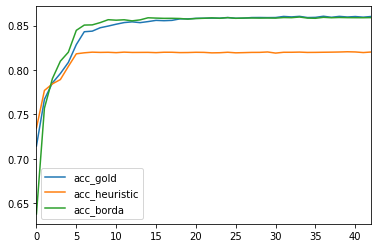

In [105]:
accs[['acc_gold', 'acc_heuristic', 'acc_borda']].plot()

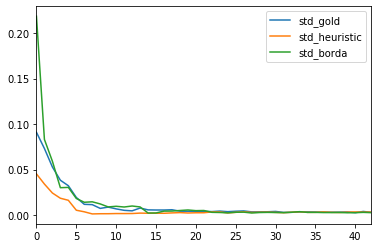

In [106]:
accs[['std_gold', 'std_heuristic', 'std_borda']].plot()